In [51]:
import scipy.sparse.csgraph as csgraph


Check connectivity

In [79]:
import numpy as np
from scipy import sparse
import graphlearning as gl
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# File paths
file_paths = {
    'Complete Data': './../Data/complete_data.csv',
    'Female Data': './../Data/female.csv',
    'Male Data': './../Data/male.csv'
}
excluded_columns = ["0", "PPT ID", "Site", "Gender", "BMD - Total", "ALM", "% fat - Total", "Race"]

# Parameters
lam = 0.1  # Ridge regression parameter (larger values encourage more smoothness)
k =4 # Number of neighbors to use in graph
p = 3      # p-Laplace value
n_splits = 5  # Number of folds for cross-validation
n_runs = 10   # Number of independent runs

# Initialize normalizer
normalizer = StandardScaler()
class graph:

    def __init__(self, W, labels=None, features=None, label_names=None, node_names=None):
         self.weight_matrix = sparse.csr_matrix(W)
    def isconnected(self):
        num_comp,comp = csgraph.connected_components(self.weight_matrix)
        connected = False
        if num_comp == 1:
            connected = True
            return connected

# Function to load and preprocess data
def load_data(file_path, excluded_columns):
    df = pd.read_csv(file_path)
    X = df.drop(columns=excluded_columns).values
    y = df['ALM'].values
    return X, y

# Store RMSE values for each file
file_rmse_values = {key: [] for key in file_paths.keys()}

for file_name, file_path in file_paths.items():
    # Load data
    X, y = load_data(file_path, excluded_columns)

    for run in range(n_runs):
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=run)  # Different random_state for each run

        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # Normalize the data
            X_train = normalizer.fit_transform(X_train)
            X_test = normalizer.transform(X_test)

            # Concatenate train and test data
            X_combined = np.vstack((X_train, X_test))
            y_combined = np.hstack((y_train, y_test))

            # Create train and test masks
            train_mask = np.zeros(len(y_combined), dtype=bool)
            train_mask[:len(y_train)] = True
            test_mask = ~train_mask

            # Graph-Laplace based regression
            B = sparse.spdiags(train_mask[None, :].astype(float), 0, len(y_combined), len(y_combined))
            W = gl.weightmatrix.knn(X_combined, k)
            G = gl.graph(W)
            Network= graph(W)
            connectivity = Network.isconnected()
            print(connectivity)

            # Result= isconnected(G)
            
            # L = G.laplacian()
#             yhat = G.plaplace(np.where(train_mask)[0], y_combined[train_mask], p)

#             # Calculate RMSE
#             rmse = np.sqrt(mean_squared_error(yhat[test_mask], y_combined[test_mask]))
#             relative_rmse = 100 * rmse / np.sqrt(np.mean(y_combined**2))
#             file_rmse_values[file_name].append(relative_rmse)

# # Create a box plot for the RMSE values of each file
# plt.figure(figsize=(12, 8))
# plt.boxplot([file_rmse_values[key] for key in file_paths.keys()], vert=True, patch_artist=True, labels=file_paths.keys())
# plt.title('Relative RMSE values for 10 independent runs with 5-fold cross-validation')
# plt.ylabel('Relative RMSE (%)')
# plt.xlabel('Data Files')
# plt.grid(True)
# plt.show()

# # Print the RMSE values
# for file_name, rmse_list in file_rmse_values.items():
#     for i, rmse in enumerate(rmse_list):
#         print(f'File: {file_name}, Run {i // n_splits + 1}, Fold {i % n_splits + 1}: Relative RMSE = {rmse:.2f}%')
print(connectivity)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
None
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


196


This is for KNN method

In [6]:
print(len(test_index))

49


This is the code for heatmaps for all x values 

In [127]:
import numpy as np
from scipy import sparse
import graphlearning as gl
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# File paths
file_paths = {
    'Male Data': '/Users/gyaneshwaragrahari/Documents/GitHub/Pennington_Project/Data/male.csv',
    'Female Data': '/Users/gyaneshwaragrahari/Documents/GitHub/Pennington_Project/Data/female.csv',
    'Complete Data': '/Users/gyaneshwaragrahari/Documents/GitHub/Pennington_Project/Data/complete_data.csv'
}
excluded_columns = ["0", "PPT ID", "Site", "Gender", "BMD - Total", "ALM", "% fat - Total", "Race"]
target_columns = ['ALM', '% fat - Total', 'BMD - Total']
# target_columns=["ALM"]

# Parameters
lam = 100  # Ridge regression parameter (larger values encourage more smoothness)
k_values = [20,25,30,35,40,45,50]  # Number of neighbors to use in graph
# p_values = [2, 3, 4, 5, 10, 15, 20, 25, 30, 35]
# k_values = [5, 10, 15, 20, 25,30]  # Number of neighbors to use in graph
# p_values = [2.0,2.2,2.4,2.6,2.8,3.0,3.2,3.4,3.6,3.8,4.0]
p_values=[4,5,10]  # p-Laplace values
n_splits = 5  # Number of folds for cross-validation
n_runs = 10   # Number of independent runs

# Initialize normalizer
normalizer = StandardScaler()

# Function to load and preprocess data
def load_data(file_path, excluded_columns, target_column):
    df = pd.read_csv(file_path)
    X = df.drop(columns=excluded_columns).values
    y = df[target_column].values
    return X, y

# Initialize storage for RMSE values
rmse_values = {
    target: {file_name: np.zeros((len(k_values), len(p_values))) for file_name in file_paths.keys()}
    for target in target_columns
}

for target in target_columns:
    for file_name, file_path in file_paths.items():
        # Load data
        X, y = load_data(file_path, excluded_columns, target)

        for run in range(n_runs):
            kf = KFold(n_splits=n_splits, shuffle=True, random_state=run)  # Different random_state for each run

            for train_index, test_index in kf.split(X):
                # Adjust train and test index to achieve 20% training and 80% testing
                X_train, X_test = X[test_index], X[train_index]
                y_train, y_test = y[test_index], y[train_index]

                # Normalize the data
                X_train = normalizer.fit_transform(X_train)
                X_test = normalizer.transform(X_test)

                # Concatenate train and test data
                X_combined = np.vstack((X_train, X_test))
                y_combined = np.hstack((y_train, y_test))

                # Create train and test masks
                train_mask = np.zeros(len(y_combined), dtype=bool)
                train_mask[:len(y_train)] = True
                test_mask = ~train_mask

                for i, k in enumerate(k_values):
                    # Create weight matrix and graph
                    W = gl.weightmatrix.knn(X_combined, k)
                    G = gl.graph(W)
                    L = G.laplacian()

                    for j, p in enumerate(p_values):
                        # Graph-Laplace based regression
                        yhat = G.plaplace(np.where(train_mask)[0], y_combined[train_mask], p)

                        # Calculate RMSE
                        rmse = np.sqrt(mean_squared_error(yhat[test_mask], y_combined[test_mask]))
                        relative_rmse = 100 * rmse / np.sqrt(np.mean(y_combined**2))
                        rmse_values[target][file_name][i, j] += relative_rmse

# Average the RMSE values over the number of runs and folds
for target in target_columns:
    for file_name in rmse_values[target].keys():
        rmse_values[target][file_name] /= (n_splits * n_runs)
     

for target in target_columns:
    print(f"\nTarget: {target}")
    for file_name, rmse_matrix in rmse_values[target].items():
        # Find the indices of the smallest RMSE value
        min_rmse_index = np.unravel_index(np.argmin(rmse_matrix, axis=None), rmse_matrix.shape)
        min_rmse = rmse_matrix[min_rmse_index]
        optimal_k = k_values[min_rmse_index[0]]
        optimal_p = p_values[min_rmse_index[1]]
        
        print(f"File: {file_name}")
        print(f"  Minimum RMSE: {min_rmse:.4f}")
        print(f"  Optimal k: {optimal_k}")
        print(f"  Optimal p: {optimal_p}\n")
# print(rmse_values[target]["Male Data"])


Target: ALM
File: Male Data
  Minimum RMSE: 9.7380
  Optimal k: 50
  Optimal p: 10

File: Female Data
  Minimum RMSE: 11.5799
  Optimal k: 50
  Optimal p: 5

File: Complete Data
  Minimum RMSE: 11.8840
  Optimal k: 20
  Optimal p: 10


Target: % fat - Total
File: Male Data
  Minimum RMSE: 20.5127
  Optimal k: 45
  Optimal p: 10

File: Female Data
  Minimum RMSE: 14.7922
  Optimal k: 50
  Optimal p: 5

File: Complete Data
  Minimum RMSE: 17.7094
  Optimal k: 20
  Optimal p: 10


Target: BMD - Total
File: Male Data
  Minimum RMSE: 9.1093
  Optimal k: 25
  Optimal p: 4

File: Female Data
  Minimum RMSE: 9.8164
  Optimal k: 40
  Optimal p: 4

File: Complete Data
  Minimum RMSE: 9.3386
  Optimal k: 45
  Optimal p: 4



In [98]:
print(rmse_values[target]["Complete Data"])

[[11.98305579 11.85358126 11.84679259 11.86324933 11.88465045 11.95990646
  12.17484414 12.19284047 12.19904551 12.20218161 12.20407617 12.20534522
  12.20625211 12.20693327 12.20746712 12.20789079 12.21135765]
 [12.50758201 12.05864301 11.94130622 11.89706668 11.88009095 11.88399948
  12.01090346 12.02366063 12.02813348 12.03040874 12.03178454 12.03271228
  12.03337223 12.03387492 12.03426268 12.03457398 12.03711924]
 [13.73524212 12.58923084 12.29703323 12.17281493 12.10925975 12.02975729
  12.04396605 12.05037495 12.05259535 12.05374027 12.05443008 12.05490415
  12.05523959 12.05549704 12.05569201 12.05584871 12.05714786]]


plotting results

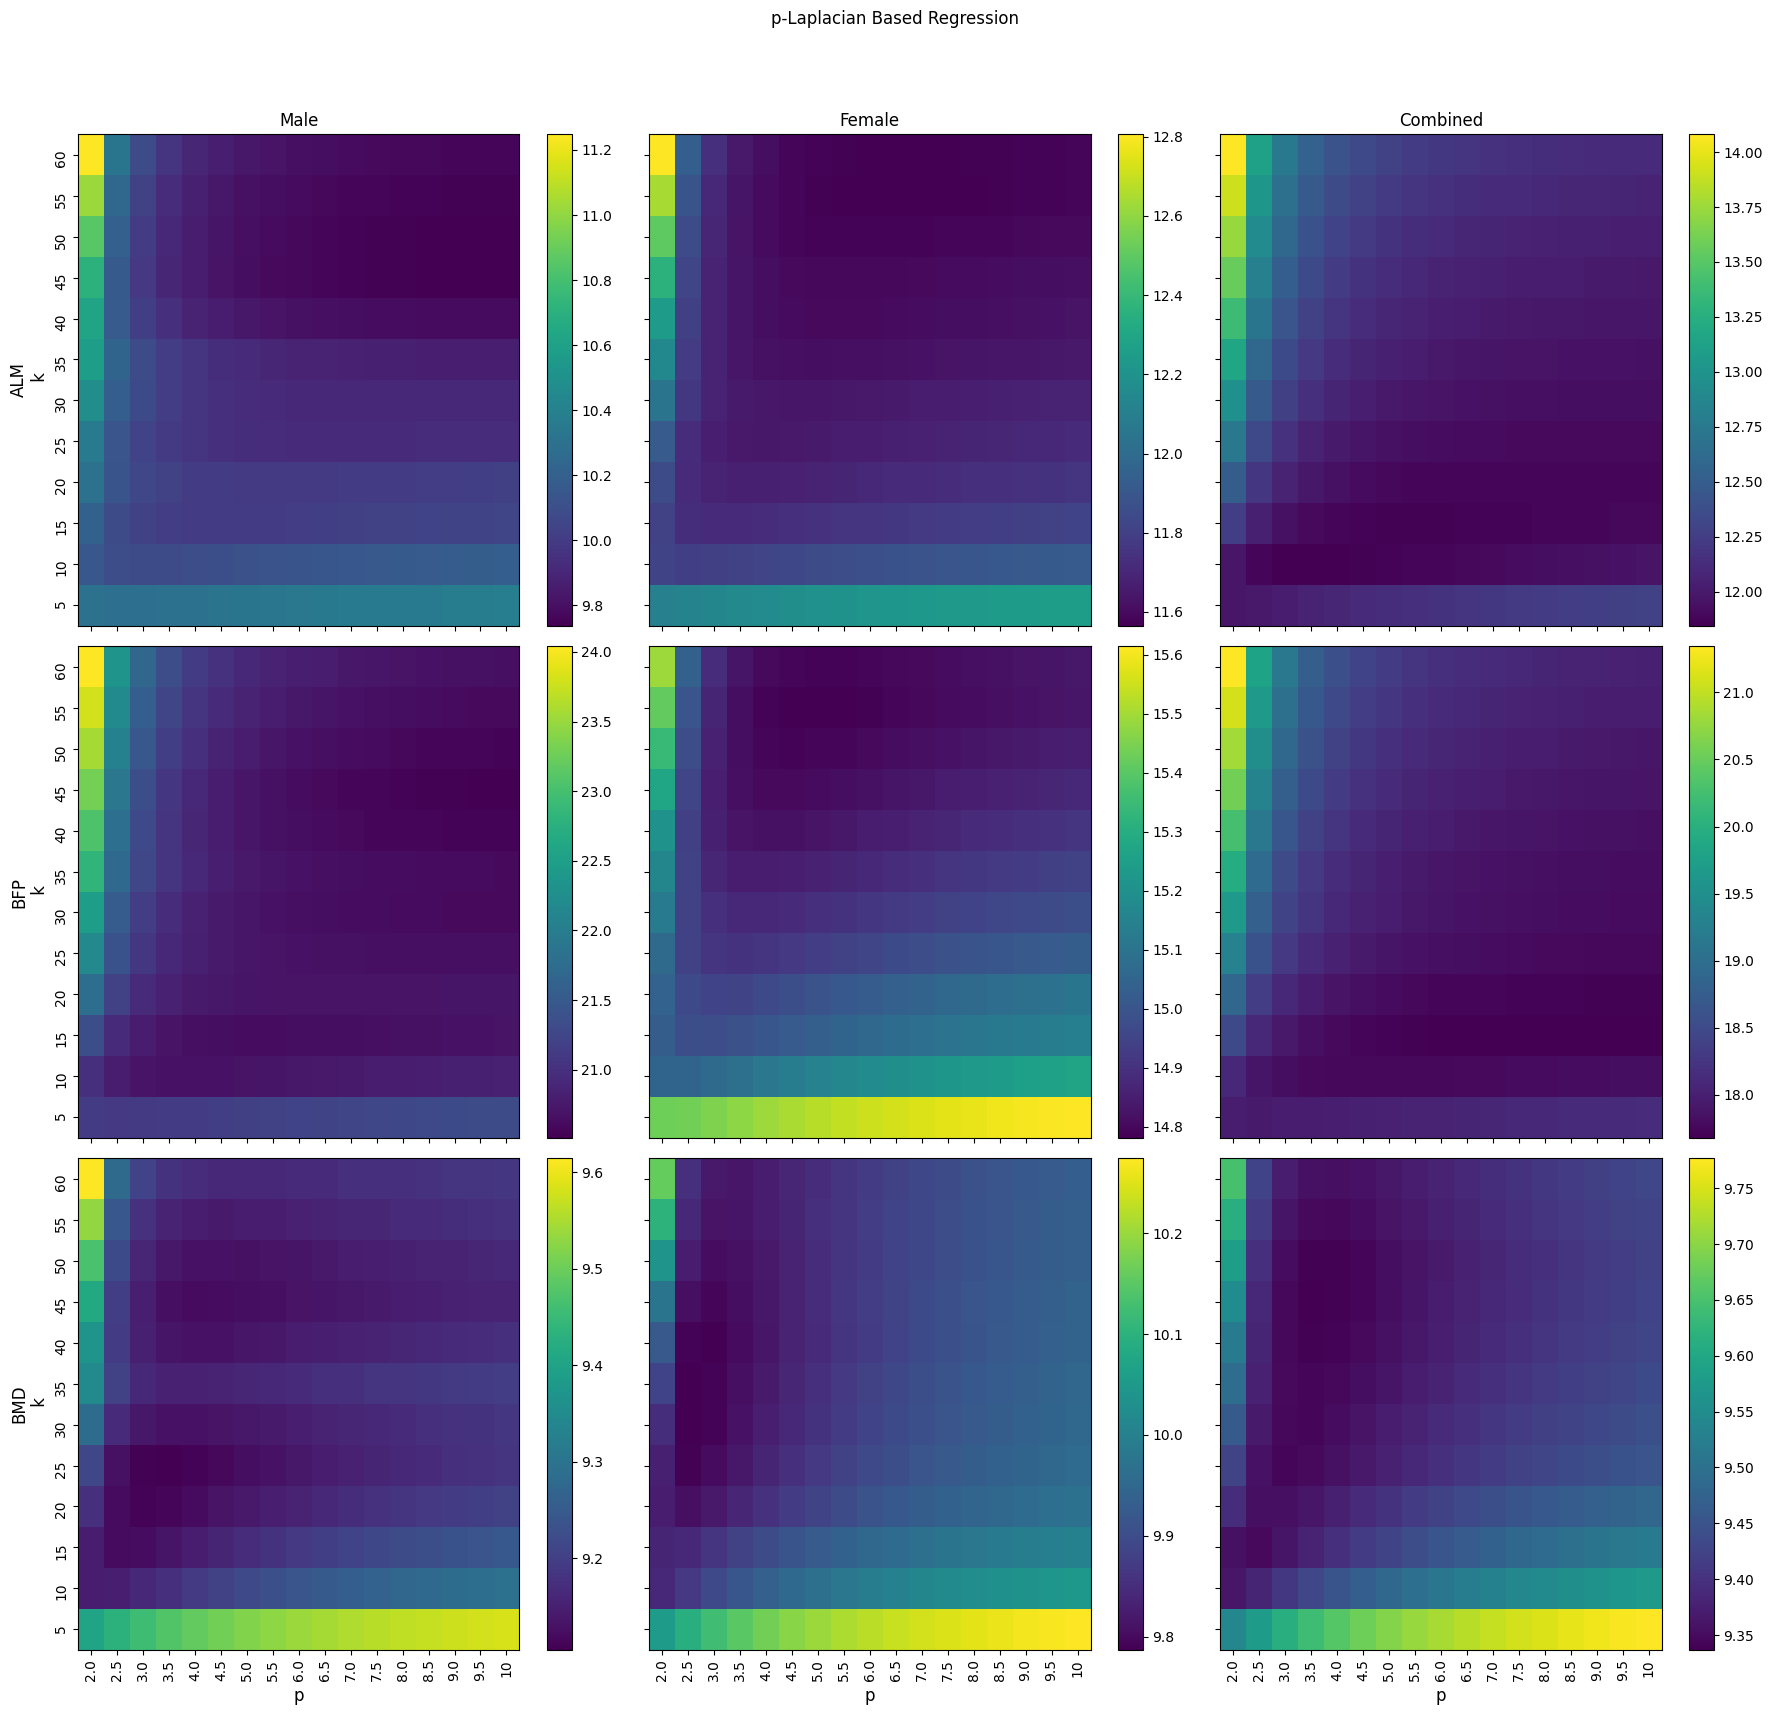

In [105]:
# Plotting the heatmaps
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
column_titles = ['Male', 'Female', 'Combined']
row_titles = ['ALM', 'BFP', 'BMD']

for i, target in enumerate(target_columns):
    for j, (file_name, rmse_matrix) in enumerate(rmse_values[target].items()):
        ax = axes[i, j]
        
        # Reverse the rows of the RMSE matrix to align with the reversed y-axis
        reversed_rmse_matrix = rmse_matrix[::-1, :]
        
        # Plot the heatmap with the reversed data
        cax = ax.matshow(reversed_rmse_matrix, cmap='viridis', aspect='auto')
        
        # Set x-axis tick labels only for the bottom row
        if i == 2:
            ax.set_xlabel('p', fontsize=12)
            ax.set_xticks(range(len(p_values)))
            ax.set_xticklabels(p_values, rotation=90)
            ax.tick_params(axis='x', bottom=True, top=False, labelbottom=True, labeltop=False)
        else:
            ax.tick_params(axis='x', bottom=True, top=False, labelbottom=False, labeltop=False)
            ax.set_xticks(range(len(p_values)))
        
        # Set y-axis tick labels only for the leftmost column
        if j == 0:
            ax.set_ylabel(f'{row_titles[i]}\n k', fontsize=12)
            ax.set_yticks(range(len(k_values)))
            
            # Reverse the k_values for the y-axis labels
            k_values_reversed = k_values[::-1]
            ax.set_yticklabels(k_values_reversed, rotation=90)
            ax.tick_params(axis='y', left=True, right=False, labelleft=True, labelright=False)
        else:
            ax.tick_params(axis='y', left=True, right=False, labelleft=False, labelright=False)
            ax.set_yticks(range(len(k_values)))
        
        # Set column titles
        if i == 0:
            ax.set_title(column_titles[j], fontsize=12)
        
        fig.colorbar(cax, ax=ax)

plt.suptitle('p-Laplacian Based Regression')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Now, we will look into the asymptotic behavior of the model for a fixed k

In [124]:
import numpy as np
from scipy import sparse
import graphlearning as gl
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# File paths
file_paths = {
    'Male Data': '/Users/gyaneshwaragrahari/Documents/GitHub/Pennington_Project/Data/male.csv',
    'Female Data': '/Users/gyaneshwaragrahari/Documents/GitHub/Pennington_Project/Data/female.csv',
    'Complete Data': '/Users/gyaneshwaragrahari/Documents/GitHub/Pennington_Project/Data/complete_data.csv'
}
excluded_columns = ["0", "PPT ID", "Site", "Gender", "BMD - Total", "ALM", "% fat - Total", "Race"]
target_columns = ['ALM', '% fat - Total', 'BMD - Total']
# target_columns=["ALM"]

# Parameters
lam = 0.1  # Ridge regression parameter (larger values encourage more smoothness)
k_values = [10,30,50]  # Number of neighbors to use in graph
# p_values = [2, 3, 4, 5, 10, 15, 20, 25, 30, 35]
# k_values = [5, 10, 15, 20, 25,30]  # Number of neighbors to use in graph
# p_values = [2.0,2.2,2.4,2.6,2.8,3.0,3.2,3.4,3.6,3.8,4.0]
p_values=[2,5,10,100,500,1000,5000,10000,50000,100000]  # p-Laplace values
n_splits = 5  # Number of folds for cross-validation
n_runs = 10   # Number of independent runs

# Initialize normalizer
normalizer = StandardScaler()

# Function to load and preprocess data
def load_data(file_path, excluded_columns, target_column):
    df = pd.read_csv(file_path)
    X = df.drop(columns=excluded_columns).values
    y = df[target_column].values
    return X, y

# Initialize storage for RMSE values
rmse_values = {
    target: {file_name: np.zeros((len(k_values), len(p_values))) for file_name in file_paths.keys()}
    for target in target_columns
}

for target in target_columns:
    for file_name, file_path in file_paths.items():
        # Load data
        X, y = load_data(file_path, excluded_columns, target)

        for run in range(n_runs):
            kf = KFold(n_splits=n_splits, shuffle=True, random_state=run)  # Different random_state for each run

            for train_index, test_index in kf.split(X):
                # Adjust train and test index to achieve 20% training and 80% testing
                X_train, X_test = X[test_index], X[train_index]
                y_train, y_test = y[test_index], y[train_index]

                # Normalize the data
                X_train = normalizer.fit_transform(X_train)
                X_test = normalizer.transform(X_test)

                # Concatenate train and test data
                X_combined = np.vstack((X_train, X_test))
                y_combined = np.hstack((y_train, y_test))

                # Create train and test masks
                train_mask = np.zeros(len(y_combined), dtype=bool)
                train_mask[:len(y_train)] = True
                test_mask = ~train_mask

                for i, k in enumerate(k_values):
                    # Create weight matrix and graph
                    W = gl.weightmatrix.knn(X_combined, k)
                    G = gl.graph(W)
                    L = G.laplacian()

                    for j, p in enumerate(p_values):
                        # Graph-Laplace based regression
                        yhat = G.plaplace(np.where(train_mask)[0], y_combined[train_mask], p)

                        # Calculate RMSE
                        rmse = np.sqrt(mean_squared_error(yhat[test_mask], y_combined[test_mask]))
                        relative_rmse = 100 * rmse / np.sqrt(np.mean(y_combined**2))
                        rmse_values[target][file_name][i, j] += relative_rmse

# Average the RMSE values over the number of runs and folds
for target in target_columns:
    for file_name in rmse_values[target].keys():
        rmse_values[target][file_name] /= (n_splits * n_runs)
     




In [113]:
print(file_name)

Complete Data


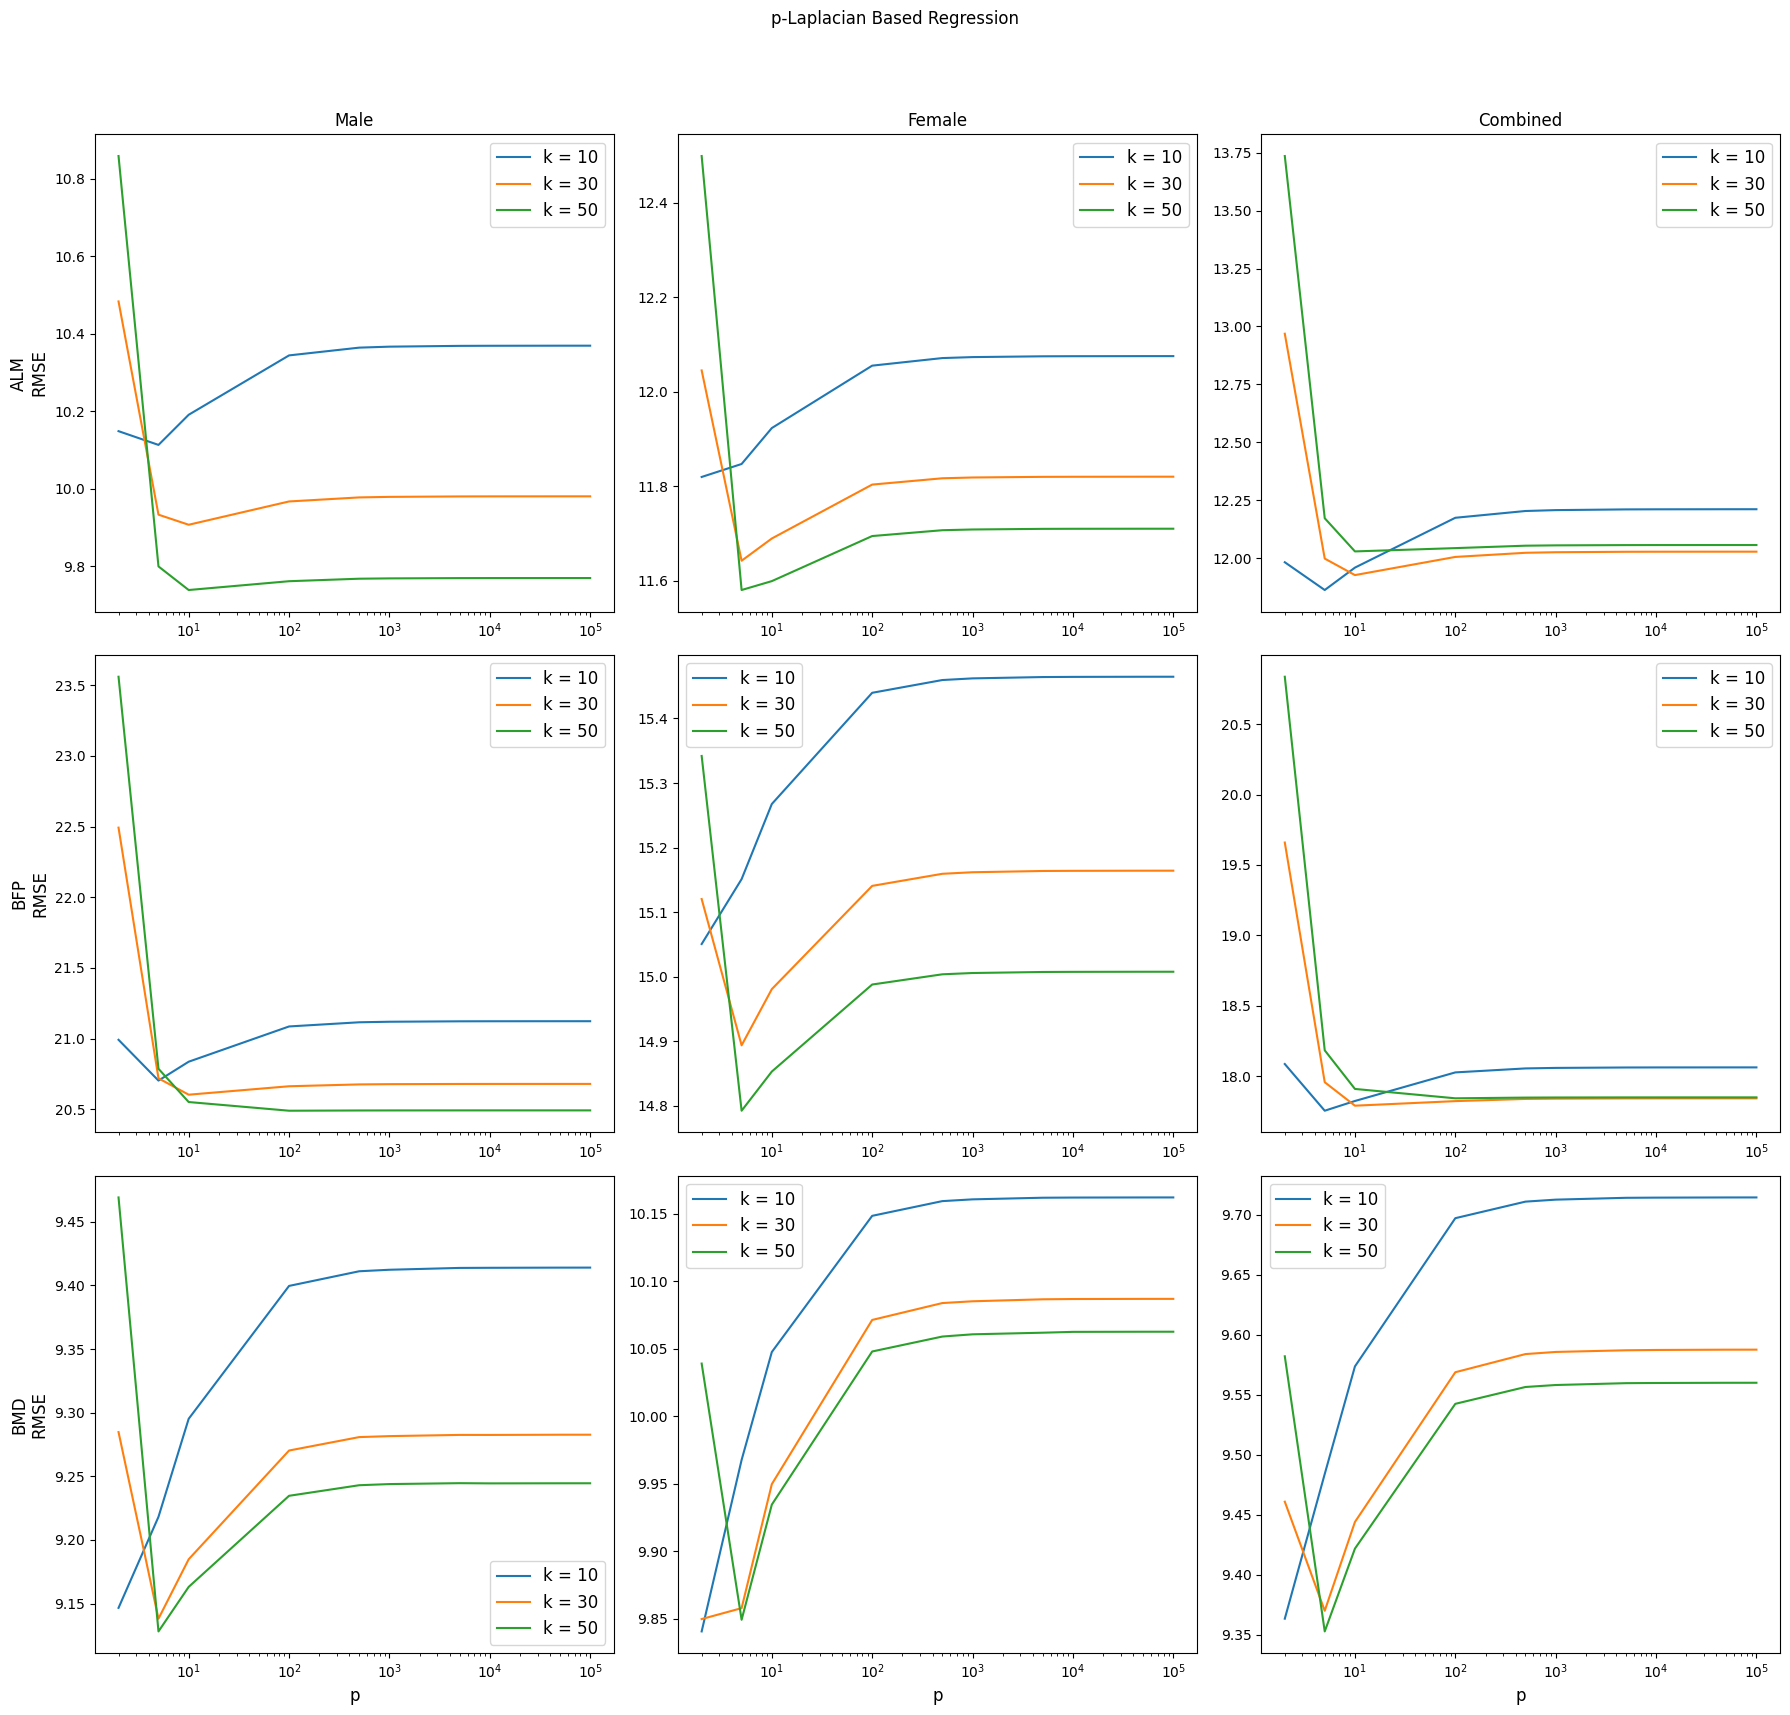

In [125]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the line plots
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
column_titles = ['Male', 'Female', 'Combined']
row_titles = ['ALM', 'BFP', 'BMD']

for i, target in enumerate(target_columns):
    for j, (file_name, rmse_matrix) in enumerate(rmse_values[target].items()):
        ax = axes[i, j]

        # Plotting lines for each k value
        for k_idx, k in enumerate(k_values):
            ax.plot(p_values, rmse_matrix[k_idx, :], label=f'k = {k}', linewidth=1.5)

        # Setting titles and labels
        if i == 0:
            ax.set_title(column_titles[j], fontsize=12)
        if j == 0:
            ax.set_ylabel(f'{row_titles[i]}\nRMSE', fontsize=12)
        if i==2:
            ax.set_xlabel('p', fontsize=12)
        ax.set_xscale('log')
        # ax.grid(False, which='both', linestyle='--', linewidth=0.5)
        ax.legend( fontsize=12, loc='best')
        
plt.suptitle('p-Laplacian Based Regression', fontsize=12 )
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


This is for epsilon ball method

top 10 biomarkers

In [2]:
male_ALM_top10=['Surface Area Total', '1  Surface Area Leg Right', 'Surface Area Leg Left', 'Surface Area Arm Left', 'Leg Volume Left', 'Leg Volume Right', '1  Surface Area Arm Right', 'Weight (kg)', 'Volume', 'Surface Area Torso']
female_ALM_top10=['Surface Area Total', 'Leg Volume Left', '1  Surface Area Leg Right', 'Surface Area Leg Left', 'Leg Volume Right', 'Weight (kg)', 'Volume', 'Calf Circumference Left', 'Thigh Circumference Left', '1  Thigh Circumference Right']
combined_ALM_top10=['Surface Area Total', 'Surface Area Arm Left', '1  Surface Area Arm Right', 'Weight (kg)', 'Surface Area Torso', 'Forearm Circumference Right', '1  Surface Area Leg Right', 'Volume', 'Surface Area Leg Left', 'Arm Volume Left']
male_BFP_top10= ['Horizontal Waist', 'Narrow Waist', 'Waist Circumference', 'Abdomen Circumference', 'Seat Circumference', 'Hip Circumference', 'Bicep Circumference Left', 'Torso Volume', 'Chest', 'Upper Arm Circumference Left']
female_BFP_top10=['Horizontal Waist', 'Waist Circumference', 'Narrow Waist', 'Abdomen Circumference', 'Bicep Circumference Left', 'Chest', 'Upper Arm Circumference Right', 'Upper Arm Circumference Left', 'Bicep Circumference Right', 'Torso Volume']
combined_BFP_top10=['Waist Circumference', 'Horizontal Waist', 'Abdomen Circumference', 'Seat Circumference', 'Hip Circumference', 'Thigh Circumference Left', '1  Thigh Circumference Right', 'MidThigh Circumference Left', 'MidThigh Circumference Right', 'Narrow Waist']
male_BMD_top10= ['1  Surface Area Arm Right', 'Surface Area Arm Left', 'Surface Area Total', 'Arm Volume Right', 'Height (cm)', 'Forearm Circumference Right', 'Arm Volume Left', 'Surface Area Leg Left', '1  Surface Area Leg Right', 'Surface Area Torso']
female_BMD_top10=['Height (cm)', 'Surface Area Total', 'Surface Area Leg Left', '1  Surface Area Leg Right', 'Outside Leg Length Left', 'Outside Leg Length Right', 'Arm Length Left', 'Surface Area Torso', 'Surface Area Arm Left', 'Hip Circumference']
combined_BMD_top10=['Surface Area Total', 'Height (cm)', 'Surface Area Arm Left', '1  Surface Area Arm Right', 'Surface Area Leg Left', '1  Surface Area Leg Right', 'Surface Area Torso', 'Arm Volume Right', 'Arm Volume Left', 'Arm Length Left']

Relevant_columns=[ male_ALM_top10,female_ALM_top10,combined_ALM_top10,male_BFP_top10,female_BFP_top10,combined_BFP_top10,male_BMD_top10,female_BMD_top10,combined_BMD_top10]

THE FOLLOWING CODE IS RUNNING THE MODEL ON RESPECTIVE TOP 10 BIOMARKERS ONLY

In [1]:
import numpy as np
from scipy import sparse
import graphlearning as gl
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# File paths
file_paths = {
    'Male': './../Data/male.csv',
    'Female': './../Data/female.csv',
    'Combined': './../Data/complete_data.csv'
}
excluded_columns = ["0", "PPT ID", "Site", "Gender", "BMD - Total", "ALM", "% fat - Total", "Race"]
target_columns = ['ALM', '% fat - Total', 'BMD - Total']

# Parameters
lam = 0.1  # Ridge regression parameter (larger values encourage more smoothness)
k_values = [5, 10, 15, 20, 25,30]  # Number of neighbors to use in graph
p_values = [2,2.2,2.4,2.6,2.8, 3.0, 4.0, 5.0, 10, 15, 20, 25, 30, 35,40,45,50,100,1000]  # p-Laplace values
n_splits = 5  # Number of folds for cross-validation
n_runs = 10   # Number of independent runs

# Initialize normalizer
normalizer = StandardScaler()

# Function to load and preprocess data
def load_data(file_path, excluded_columns, target_column):
    df = pd.read_csv(file_path)
    X = df[relevant_columns].values
    y = df[target_column].values
    return X, y


Relevant_columns = [
    male_ALM_top10, female_ALM_top10, combined_ALM_top10,
    male_BFP_top10, female_BFP_top10, combined_BFP_top10,
    male_BMD_top10, female_BMD_top10, combined_BMD_top10
]
# Initialize storage for RMSE values
rmse_values = {
    target: {file_name: np.zeros((len(k_values), len(p_values))) for file_name in file_paths.keys()}
    for target in target_columns
}

# Mapping for selecting relevant columns
relevant_columns_mapping = {
    ('Male', 'ALM'): male_ALM_top10,
    ('Female', 'ALM'): female_ALM_top10,
    ('Combined', 'ALM'): combined_ALM_top10,
    ('Male', '% fat - Total'): male_BFP_top10,
    ('Female', '% fat - Total'): female_BFP_top10,
    ('Combined', '% fat - Total'): combined_BFP_top10,
    ('Male', 'BMD - Total'): male_BMD_top10,
    ('Female', 'BMD - Total'): female_BMD_top10,
    ('Combined', 'BMD - Total'): combined_BMD_top10
}


for target in target_columns:
    print(  print(f'target', target))
    for file_name, file_path in file_paths.items():
        
        # Load data
        relevant_columns = relevant_columns_mapping[(file_name, target)]
        X, y = load_data(file_path, relevant_columns, target)

        for run in range(n_runs):
            print(f'run', run)
            kf = KFold(n_splits=n_splits, shuffle=True, random_state=run)  # Different random_state for each run

            for train_index, test_index in kf.split(X):
                # Adjust train and test index to achieve 20% training and 80% testing
                X_train, X_test = X[test_index], X[train_index]
                y_train, y_test = y[test_index], y[train_index]

                # Normalize the data
                X_train = normalizer.fit_transform(X_train)
                X_test = normalizer.transform(X_test)

                # Concatenate train and test data
                X_combined = np.vstack((X_train, X_test))
                y_combined = np.hstack((y_train, y_test))

                # Create train and test masks
                train_mask = np.zeros(len(y_combined), dtype=bool)
                train_mask[:len(y_train)] = True
                test_mask = ~train_mask

                for i, k in enumerate(k_values):
                    # Create weight matrix and graph
                    W = gl.weightmatrix.knn(X_combined, k)
                    G = gl.graph(W)
                    L = G.laplacian()

                    for j, p in enumerate(p_values):
                        # Graph-Laplace based regression
                        yhat = G.plaplace(np.where(train_mask)[0], y_combined[train_mask], p)

                        # Calculate RMSE
                        rmse = np.sqrt(mean_squared_error(yhat[test_mask], y_combined[test_mask]))
                        relative_rmse = 100 * rmse / np.sqrt(np.mean(y_combined**2))
                        rmse_values[target][file_name][i, j] += relative_rmse

# Average the RMSE values over the number of runs and folds
for target in target_columns:
    for file_name in rmse_values[target].keys():
        rmse_values[target][file_name] /= (n_splits * n_runs)


KeyboardInterrupt: 

This is for box plots

In [2]:
import numpy as np
import pandas as pd
from scipy import sparse
import graphlearning as gl
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# File paths
file_paths = {
    'Male Data': '/Users/gyaneshwaragrahari/Documents/GitHub/Pennington_Project/Data/male.csv',
    'Female Data': '/Users/gyaneshwaragrahari/Documents/GitHub/Pennington_Project/Data/female.csv',
    'Complete Data': '/Users/gyaneshwaragrahari/Documents/GitHub/Pennington_Project/Data/complete_data.csv'
}
excluded_columns = ["0", "PPT ID", "Site", "Gender", "BMD - Total", "ALM", "% fat - Total", "Race"]
target_columns = ['ALM', '% fat - Total', 'BMD - Total']

# Optimal k and p values for each target and file
optimal_values = {
    'ALM': {'Male Data': (50, 10), 'Female Data': (55, 6.5), 'Complete Data': (10, 3.5)},
    '% fat - Total': {'Male Data': (45, 10), 'Female Data': (55, 5.0), 'Complete Data': (15, 8.0)},
    'BMD - Total': {'Male Data': (25, 3.5), 'Female Data': (30, 2.5), 'Complete Data': (45, 3.5)}
}

# Parameters
lam = 100  # Ridge regression parameter (larger values encourage more smoothness)
n_splits = 5  # Number of folds for cross-validation
n_runs = 10   # Number of independent runs

# Initialize normalizer
normalizer = StandardScaler()

# Function to load and preprocess data
def load_data(file_path, excluded_columns, target_column):
    df = pd.read_csv(file_path)
    X = df.drop(columns=excluded_columns).values
    y = df[target_column].values
    return X, y

# Initialize storage for RMSE values for each run and fold
rmse_data = {
    target: {file_name: [] for file_name in file_paths.keys()}
    for target in target_columns
}

for target in target_columns:
    for file_name, file_path in file_paths.items():
        # Load data
        X, y = load_data(file_path, excluded_columns, target)

        # Retrieve optimal k and p values
        optimal_k, optimal_p = optimal_values[target][file_name]

        for run in range(n_runs):
            kf = KFold(n_splits=n_splits, shuffle=True, random_state=run)  # Different random_state for each run

            for train_index, test_index in kf.split(X):
                # Adjust train and test index to achieve 20% training and 80% testing
                X_train, X_test = X[test_index], X[train_index]
                y_train, y_test = y[test_index], y[train_index]

                # Normalize the data
                X_train = normalizer.fit_transform(X_train)
                X_test = normalizer.transform(X_test)

                # Concatenate train and test data
                X_combined = np.vstack((X_train, X_test))
                y_combined = np.hstack((y_train, y_test))

                # Create train and test masks
                train_mask = np.zeros(len(y_combined), dtype=bool)
                train_mask[:len(y_train)] = True
                test_mask = ~train_mask

                # Create weight matrix and graph
                W = gl.weightmatrix.knn(X_combined, optimal_k)
                G = gl.graph(W)
                L = G.laplacian()

                # Graph-Laplace based regression
                yhat = G.plaplace(np.where(train_mask)[0], y_combined[train_mask], optimal_p)

                # Calculate RMSE and store
                rmse = np.sqrt(mean_squared_error(yhat[test_mask], y_combined[test_mask]))
                relative_rmse = 100 * rmse / np.sqrt(np.mean(y_combined**2))
                rmse_data[target][file_name].append(relative_rmse)


/Users/gyaneshwaragrahari/opt/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


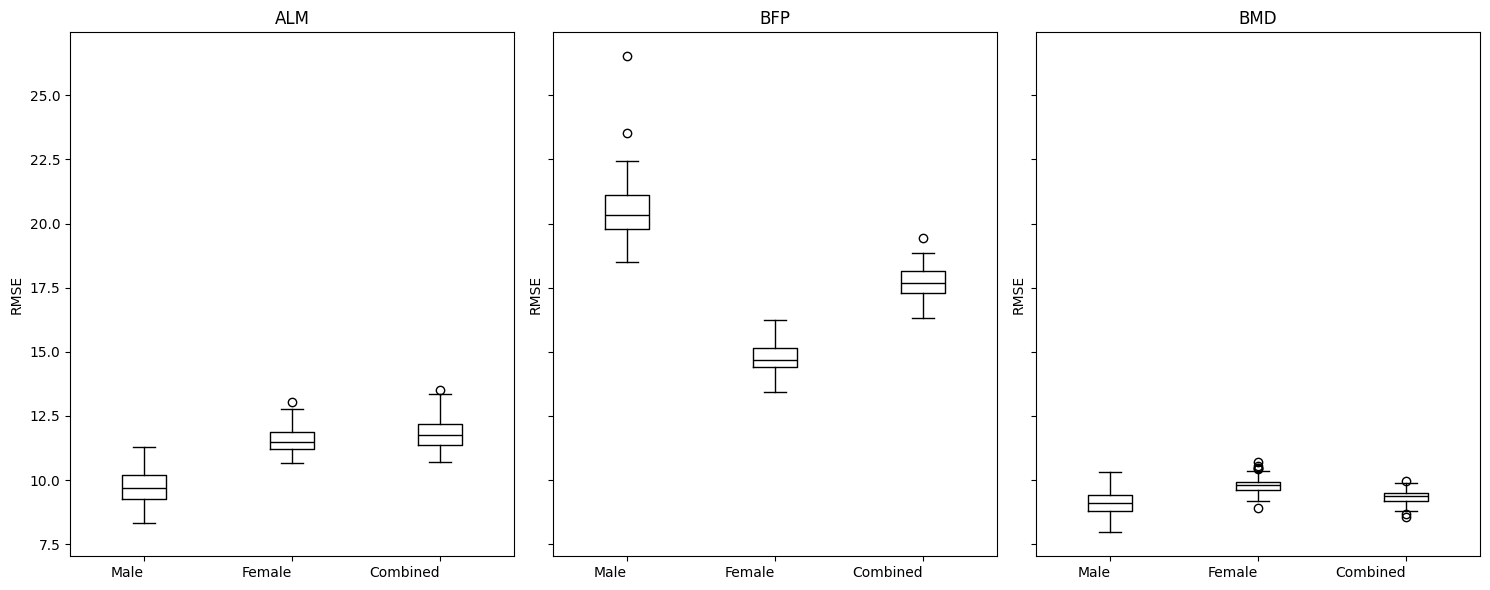

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

# Titles and labels
plot_titles = ['ALM', 'BFP', 'BMD']  # Changed '% Fat - Total' to 'BFP'
file_labels = ['Male', 'Female', 'Combined']  # Changed labels



for ax, target, title in zip(axes, target_columns, plot_titles):
    data = [rmse_data[target][file] for file in file_paths.keys()]
    boxplot = ax.boxplot(data, 
        
                         medianprops=dict(color="black"),
                         showfliers=True)
    
    ax.set_title(title)
    ax.set_xticklabels(file_labels, ha='right')
    ax.set_ylabel('RMSE')

plt.tight_layout()
plt.savefig('/Users/gyaneshwaragrahari/Documents/GitHub/Pennington_Project/Final_Results/P-Laplacian/boxplot_p-laplacian.png', dpi=300)
plt.show()

making a representative graph

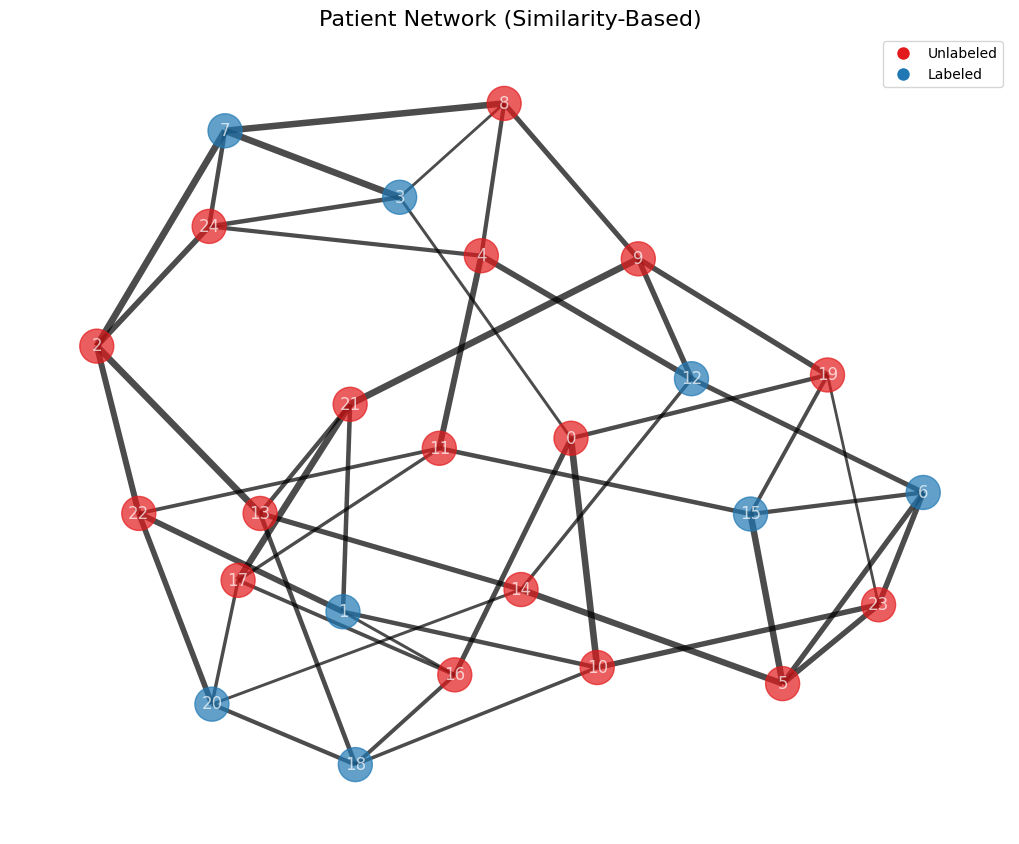

In [83]:
# import networkx as nx
# import matplotlib.pyplot as plt
# import random

# # Parameters
# num_nodes = 25
# degree = 4  # Each node will have exactly 4 neighbors
# min_edge_width = 2
# max_edge_width = 5.0

# # Create a random regular graph with 25 nodes and each having 4 neighbors
# G = nx.random_regular_graph(d=degree, n=num_nodes)

# # Assign colors to nodes: First 8 black (labeled) and the rest red (unlabeled)
# node_colors = ['#1f78b4' if i < 8 else '#e31a1c' for i in range(num_nodes)]

# # Generate random widths for the edges
# edge_widths = [random.uniform(min_edge_width, max_edge_width) for _ in range(G.number_of_edges())]

# # Use the Kamada-Kawai layout for the graph
# pos = nx.kamada_kawai_layout(G)

# # Draw the graph
# plt.figure(figsize=(10, 8))
# nx.draw(G, pos, node_color=node_colors, edge_color='black', with_labels=True,
#         node_size=600, font_size=12, font_color='white', width=edge_widths, alpha=0.7)

# # Create a legend
# red_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#e31a1c', markersize=10, label='Unlabeled')
# blue_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#1f78b4', markersize=10, label='Labeled')
# plt.legend(handles=[red_patch, blue_patch])

# # Show the plot
# plt.title("Patient Network (Similarity-Based)", fontsize=16)
# plt.axis('off')  # Turn off the axis
# plt.show()


creating random graphs

In [4]:
# import networkx as nx
# import matplotlib.pyplot as plt
# import random

# # Parameters
# num_nodes = 25
# degree = 4  # Each node will have exactly 4 neighbors
# min_edge_width = 2
# max_edge_width = 5.0

# # Create a random regular graph with 25 nodes and each having 4 neighbors
# G = nx.random_regular_graph(d=degree, n=num_nodes)

# # Assign colors to nodes: First 8 blue (labeled) and the rest red (unlabeled)
# node_colors = ['#1f78b4' if i < 8 else '#e31a1c' for i in range(num_nodes)]

# # Assign colors to nodes as attributes
# for i, node in enumerate(G.nodes()):
#     G.nodes[node]['color'] = node_colors[i]

# # Generate random widths for the edges
# edge_widths = [random.uniform(min_edge_width, max_edge_width) for _ in range(G.number_of_edges())]

# # Use the Kamada-Kawai layout for the graph
# pos = nx.kamada_kawai_layout(G)

# # Start random walk from a red node and stop when a blue node is reached
# red_nodes = [node for node, color in zip(G.nodes(), node_colors) if color == '#e31a1c']
# start_node = random.choice(red_nodes)
# current_node = start_node
# walk = [current_node]

# while True:
#     neighbors = list(G.neighbors(current_node))
#     if not neighbors:
#         break  # Stop if no more nodes to visit

#     next_node = random.choice(neighbors)
#     walk.append(next_node)

#     # Stop if the next node is colored blue (#1f78b4)
#     if G.nodes[next_node]['color'] == '#1f78b4':
#         break

#     current_node = next_node

# # Get the edges involved in the random walk
# path_edges = list(zip(walk, walk[1:]))
# print("Random walk sequence:", walk)
# # Draw the graph
# plt.figure(figsize=(10, 8))
# nx.draw(G, pos, node_color=node_colors, edge_color='black', with_labels=True,
#         node_size=600, font_size=12, font_color='white', width=edge_widths, alpha=0.7)

# # Highlight the edges involved in the random walk with purple color
# nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='orange', arrows=True, arrowstyle='-|>', arrowsize=20, width=edge_widths, alpha=0.8)

# # Create a legend
# red_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#e31a1c', markersize=10, label='Unlabeled')
# blue_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#1f78b4', markersize=10, label='Labeled')
# plt.legend(handles=[red_patch, blue_patch])

# # Show the plot
# plt.title("Random Walk", fontsize=16)
# plt.axis('off')  # Turn off the axis
# plt.show()


In [1]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Data
# models = ['SVR', 'LSSVR', 'RF', 'XGBoost', 'NN', 'p-Laplacian\n (20% Training)']
# rmse_values = [
#     [7.8, 13.2, 7.4],
#     [8.4, 10.9, 8.09],
#     [8, 16, 7.6],
#     [8.1, 16.2, 7.86],
#     [8.6, 12.6, 8.14],
#     [11.8, 17.7, 9.3]
# ]

# # Number of models and groups
# n_models = len(models)
# n_groups = len(rmse_values[0])

# # Bar width
# bar_width = 0.25

# # X positions for the groups
# index = np.arange(n_models)

# # Colors for each RMSE type
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# # Plotting
# fig, ax = plt.subplots()

# for i in range(n_groups):
#     plt.bar(index + i * bar_width, 
#             [rmse_values[j][i] for j in range(n_models)], 
#             bar_width, 
#             label=['ALM', 'BFP', 'BMD'][i], 
#             color=colors[i])

# # Labels and Title
# plt.xlabel('Models')
# plt.ylabel('RMSE')
# plt.title('RMSE by Model and Target')
# plt.xticks(index + bar_width, models)
# plt.legend()

# # Show plot
# plt.tight_layout()
# plt.show()
